# Team Projects

The datasets we'll use for our **Team Projects** come from the [Housing Affordability Data System](https://catalog.data.gov/dataset/housing-affordability-data-system-hads).
See their website for more information about the data.

We've downloaded the data into the **/data** folder called `project.zip` which is password-protected:

In [478]:
import numpy as np 
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [124]:
sx ls ../data

['2017Q1-capitalbikeshare-tripdata.csv',
 '2017Q2-capitalbikeshare-tripdata.csv',
 '2017Q3-capitalbikeshare-tripdata.csv',
 '2017Q4-capitalbikeshare-tripdata.csv',
 'data_goes_here.txt',
 'project',
 'project.zip']

To unzip that data using Python libraries:

In [125]:
import zipfile
import os.path

password = "housing23" # ask the instructor for the password
path = "../data"

with zipfile.ZipFile(os.path.join(path, "project.zip")) as zf:
    file_list = zf.namelist()
    zf.extractall(path=path, pwd=bytes(password, "utf-8"))

Let's confirm that the [Python-based `unzip`](https://docs.python.org/3/library/zipfile.html) worked correctly, let's look for files in the target directory:

In [126]:
sx ls ../data/project

['HUD_median_incomes_1985_2009.csv', 'thads2013m.csv', 'thads2013n.csv']

What's in those files?

In [127]:
import pandas as pd

for filename in file_list:
    fullpath = os.path.join(path, filename)

    if os.path.isfile(fullpath):
        df = pd.read_csv(fullpath)
        print(fullpath)
        print(df.head(4))

../data/project/thads2013m.csv
          Control    SMSA METRO  BEDRMS  BUILT STATUS  TYPE   VALUE  VACANCY  \
0  '000000054288'  '5000'   '7'       4   2003    '1'     1   90000       -6   
1  '000000054290'  '5000'   '7'       2   2003    '1'     1      -6       -6   
2  '000000054291'  '5000'   '7'       2   2007    '1'     1  300000       -6   
3  '000000054295'  '5000'   '7'       2   2002    '1'     1      -6       -6   

  TENURE  ...  FMTCOSTMEDRELFMRCAT      FMTINCRELFMRCAT  FMTCOST06RELAMICAT  \
0    '1'  ...  '2 50.1 - 100% FMR'  '2 50.1 - 100% FMR'  '6 100 - 120% AMI'   
1    '2'  ...  '2 50.1 - 100% FMR'  '2 50.1 - 100% FMR'    '4 60 - 80% AMI'   
2    '1'  ...           '3 GT FMR'           '3 GT FMR'      '7 120% AMI +'   
3    '2'  ...           '3 GT FMR'           '3 GT FMR'      '7 120% AMI +'   

   FMTCOST08RELAMICAT  FMTCOST12RELAMICAT FMTCOSTMEDRELAMICAT  \
0      '7 120% AMI +'      '7 120% AMI +'  '6 100 - 120% AMI'   
1    '4 60 - 80% AMI'    '4 60 - 80% AMI' 

Next is your turn :)
In your teams, work through the stages of data prep, exploring the data, representation, modeling, evaluation, visualization, and so.
Impress us with what you can do with this dataset.

One hint: you may want to use [`join()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) during data preparation.

In [189]:
import os.path
import pandas as pd

path = "../data/project"
filename = "thads2013m.csv"
fullpath = os.path.join(path, filename)
df_m = pd.read_csv(fullpath).replace("'","", regex=True)
cols  = [x.upper() for x in df_m.columns]
df_m.columns = cols
print(df_m.shape)
df_m.head(4)

(65899, 98)


,CONTROL,SMSA,METRO,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,...,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTSTATUS
0,000000054288,5000,7,4,2003,1,1,90000,-6,1,...,2 50.1 - 100% FMR,2 50.1 - 100% FMR,6 100 - 120% AMI,7 120% AMI +,7 120% AMI +,6 100 - 120% AMI,4 60 - 80% AMI,.,2 30% to 50%,-5
1,000000054290,5000,7,2,2003,1,1,-6,-6,2,...,2 50.1 - 100% FMR,2 50.1 - 100% FMR,4 60 - 80% AMI,4 60 - 80% AMI,4 60 - 80% AMI,4 60 - 80% AMI,2 30 - 50% AMI,0 Not Assisted,2 30% to 50%,-5
2,000000054291,5000,7,2,2007,1,1,300000,-6,1,...,3 GT FMR,3 GT FMR,7 120% AMI +,7 120% AMI +,7 120% AMI +,7 120% AMI +,7 120% AMI +,.,3 50% or More,-5
3,000000054295,5000,7,2,2002,1,1,-6,-6,2,...,3 GT FMR,3 GT FMR,7 120% AMI +,7 120% AMI +,7 120% AMI +,7 120% AMI +,6 100 - 120% AMI,0 Not Assisted,2 30% to 50%,-5


In [190]:
import os.path
import pandas as pd

path = "../data/project"
filename = "thads2013n.csv"
fullpath = os.path.join(path, filename)

df_n = pd.read_csv(fullpath).replace("'","", regex=True)
cols  = [x.upper() for x in df_n.columns]
df_n.columns = cols
df_n.head(4)

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,...,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,100003130103,82,3,1,73738,956,15738,26213,40322,11067,...,1 LTE 50% FMR,2 30 - 50% AMI,2 30 - 50% AMI,2 30 - 50% AMI,2 30 - 50% AMI,2 30 - 50% AMI,.,2 30% to 50%,-5,-5
1,100006110249,50,5,3,55846,1100,17165,28604,45744,24218,...,3 GT FMR,4 60 - 80% AMI,4 60 - 80% AMI,6 100 - 120% AMI,4 60 - 80% AMI,7 120% AMI +,.,1 Less than 30%,-5,-5
2,100006370140,53,5,3,55846,1100,13750,22897,36614,15470,...,2 50.1 - 100% FMR,4 60 - 80% AMI,5 80 - 100% AMI,6 100 - 120% AMI,4 60 - 80% AMI,4 60 - 80% AMI,.,3 50% or More,-5,-5
3,100006520140,67,5,3,55846,949,13750,22897,36614,13964,...,2 50.1 - 100% FMR,6 100 - 120% AMI,7 120% AMI +,7 120% AMI +,5 80 - 100% AMI,4 60 - 80% AMI,.,1 Less than 30%,-5,-5


In [185]:
import os.path
import pandas as pd

path = "../data/project"
filename = "HUD_median_incomes_1985_2009.csv"
fullpath = os.path.join(path, filename)

df_median= pd.read_csv(fullpath).replace('"','', regex=True)
cols  = [x.upper() for x in df_median.columns]
df_median.head(4)

,IN09_SMSA,MSA_Codebook,MSA,IN85_HUDMED,IN87_HUDMED,IN89_HUDMED,IN91_HUDMED,IN93_HUDMED,IN95_HUDMED,IN97_HUDMED,IN99_HUDMED,IN01_HUDMED,IN03_HUDMED,IN05_HUDMED,IN07_HUDMED,IN09_HUDMED
0,80,"0080 Akron, OH",80,29450,31500,34800,40000,40100,41300,44300,49900,54100,60300,60700,60300.0,65000.00
1,160,"0160 Albany-Schenectady-Troy, NY",160,27450,29500,32800,37500,43800,43800,47000,49700,53000,59800,63450,63500.0,70816.67
2,200,"0200 Albuquerque, NM",200,26350,29700,32100,34600,37600,38300,44400,46100,49000,51400,54200,55900.0,59500.00
3,240,"0240 Allentown-Bethlehem-Easton, PA",240,28550,31100,33700,38600,43000,43000,45800,49400,52000,59700,60650,65800.0,70000.00


In [233]:
# df_merge = pd.concat([df_m, df_n], join="outer", ignore_index=True)
# df_merge

In [328]:
df_merge = df_m.merge(df_n, on='CONTROL', how='outer')

In [383]:
df_m_modified= df_m.rename(index=str, columns={"SMSA": "MSA"})
df_m_modified['MSA']=df_m_modified['MSA'].astype(str)
df_m_modified['MSA'] = df_m_modified['MSA'].astype(str).str[1:-1]
df_median['MSA'] = df_median['MSA'].astype(str)
df_m_median = pd.merge(df_m_modified, df_median, on="MSA", how='left')

combined_df = pd.concat([df_n,df_m_median], join="outer", axis = 0)

pd.options.display.max_columns = None
combined_df

/Users/macdev/Documents/oreilly_course/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,ABL30,ABL50,ABL80,ABLMED,AGE1,APLMED,ASSISTED,BEDRMS,BUILT,BURDEN,CONTROL,COST06,COST06RELAMICAT,COST06RELAMIPCT,COST06RELFMRCAT,COST06RELFMRPCT,COST06RELPOVCAT,COST06RELPOVPCT,COST08,COST08RELAMICAT,COST08RELAMIPCT,COST08RELFMRCAT,COST08RELFMRPCT,COST08RELPOVCAT,COST08RELPOVPCT,COST12,COST12RELAMICAT,COST12RELAMIPCT,COST12RELFMRCAT,COST12RELFMRPCT,COST12RELPOVCAT,COST12RELPOVPCT,COSTMED,COSTMEDRELAMICAT,COSTMEDRELAMIPCT,COSTMEDRELFMRCAT,COSTMEDRELFMRPCT,COSTMEDRELPOVCAT,COSTMEDRELPOVPCT,FMR,FMTASSISTED,FMTBEDRMS,FMTBUILT,FMTBURDEN,FMTCOST06RELAMICAT,FMTCOST06RELFMRCAT,FMTCOST06RELPOVCAT,FMTCOST08RELAMICAT,FMTCOST08RELFMRCAT,FMTCOST08RELPOVCAT,FMTCOST12RELAMICAT,FMTCOST12RELFMRCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELAMICAT,FMTCOSTMEDRELFMRCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELAMICAT,FMTINCRELFMRCAT,FMTINCRELPOVCAT,FMTMETRO3,FMTOWNRENT,FMTREGION,FMTSTATUS,FMTSTRUCTURETYPE,FMTZADEQ,GL30,GL50,GL80,GLMED,IN01_HUDMED,IN03_HUDMED,IN05_HUDMED,IN07_HUDMED,IN09_HUDMED,IN09_SMSA,IN85_HUDMED,IN87_HUDMED,IN89_HUDMED,IN91_HUDMED,IN93_HUDMED,IN95_HUDMED,IN97_HUDMED,IN99_HUDMED,INCRELAMICAT,INCRELAMIPCT,INCRELFMRCAT,INCRELFMRPCT,INCRELPOVCAT,INCRELPOVPCT,IPOV,L30,L50,L80,LMED,METRO,METRO3,MSA,MSA_Codebook,NUNITS,OTHERCOST,OWNRENT,PER,REGION,ROOMS,STATUS,STRUCTURETYPE,TENURE,TOTSAL,TYPE,UTILITY,VACANCY,VALUE,WEIGHT,WGTMETRO,ZADEQ,ZINC2,ZSMHC
0,20234.571429,33702.428571,51842.571429,66364.20,82,51616.60,-9,2,2006,0.354919,100003130103,648.588189,2,39.092655,2,67.843953,4,234.422405,696.905247,2,42.004891,2,72.898038,4,251.885876,803.050535,2,48.402635,2,84.001102,4,290.250487,615.156712,2,37.077624,2,64.346936,4,222.339102,956.00,.,2 2BR,2000-2009,2 30% to 50%,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,1 LTE 50% FMR,3 150-200% Poverty,-5,1 Owner,-5,-5,1 Single Family,1 Adequate,15738,26213,40322,73738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,34.913187,1,47.126046,3,162.835457,11067,15738,26213,40322,73738,NaN,3,NaN,NaN,1,213.750000,1,1,1,6,1,1,1,0,1,169.000000,-6,40000,3117.394239,NaN,1,18021,533
1,19911.400000,33180.640000,53063.040000,64781.36,50,55846.00,-9,4,1980,0.047527,100006110249,1167.640781,4,72.097331,3,106.149162,3,192.855030,1324.671218,4,81.793356,3,120.424656,4,218.791183,1669.643405,6,103.094063,3,151.785764,4,275.768999,1058.988479,4,65.388468,2,96.271680,3,174.909320,1100.00,.,4 4BR+,1980-1989,1 Less than 30%,4 60 - 80% AMI,3 GT FMR,3 150-200% Poverty,4 60 - 80% AMI,3 GT FMR,4 200%+ Poverty,6 100 - 120% AMI,3 GT FMR,4 200%+ Poverty,4 60 - 80% AMI,2 50.1 - 100% FMR,3 150-200% Poverty,7 120% AMI +,3 GT FMR,4 200%+ Poverty,-5,1 Owner,-5,-5,1 Single Family,1 Adequate,17165,28604,45744,55846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,220.178706,3,279.456818,4,507.725659,24218,17165,28604,45744,55846,NaN,5,NaN,NaN,1,58.333333,1,4,3,6,1,1,1,123000,1,245.333333,-6,130000,2150.725544,NaN,1,122961,487
2,19937.500000,33200.650000,53090.300000,64781.36,53,44676.80,-9,4,1985,0.602703,100006370140,1193.393209,4,73.687444,3,108.490292,4,308.569673,1374.582175,5,84.875166,3,124.962016,4,355.418791,1772.627006,6,109.452905,3,161.147910,4,458.339239,1068.025168,4,65.946449,2,97.093197,4,276.153890,1100.00,.,4 4BR+,1980-1989,3 50% or More,4 60 - 80% AMI,3 GT FMR,4 200%+ Poverty,5 80 - 100% AMI,3 GT FMR,4 200%+ Poverty,6 100 - 120% AMI,3 GT FMR,4 200%+ Poverty,4 60 - 80% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,4 60 - 80% AMI,2 50.1 - 100% FMR,3 150-200% Poverty,-5,1 Owner,-5,-5,1 Single Family,1 Adequate,13750,22897,36614,55846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,62.614153,2,63.577273,3,180.827408,15470,13750,22897,36614,55846,NaN,5,NaN,NaN,1,37.500000,1,2,3,7,1,1,1,28000,1,159.000000,-6,150000,2213.789404,NaN,1,27974,1405
3,17875.000000,29766.100000,47598.200000,58079.84,67,44676.80,-9,3,1985,0.103911,100006520140,1578.857612,6,108.7370

In [270]:
# def get_msa_codebook(x):
#     try:
#         return list(df_median[df_median["MSA"]==int(x)]["MSA_Codebook"])[0]
#     except:
#         return None
# df_merge["MSA_CODEBOOK"] = df_merge["SMSA"].apply(lambda x: get_msa_codebook(x))

In [389]:
sliced_df = combined_df[['AGE1',
'APLMED',
'BUILT',
'BURDEN',
'COSTMED',
'FMR',
'ZSMHC',
'PER',
'LMED',
'ZINC2',
'UTILITY',
'FMTSTRUCTURETYPE',
'TENURE']]

In [390]:
sliced_df

,AGE1,APLMED,BUILT,BURDEN,COSTMED,FMR,ZSMHC,PER,LMED,ZINC2,UTILITY,FMTSTRUCTURETYPE,TENURE
0,82,51616.60,2006,0.354919,615.156712,956.00,533,1,73738,18021,169.000000,1 Single Family,1
1,50,55846.00,1980,0.047527,1058.988479,1100.00,487,4,55846,122961,245.333333,1 Single Family,1
2,53,44676.80,1985,0.602703,1068.025168,1100.00,1405,2,55846,27974,159.000000,1 Single Family,1
3,67,44676.80,1985,0.103911,1411.700224,949.00,279,2,55846,32220,179.000000,1 Single Family,1
4,26,48792.80,1980,0.094019,759.000000,737.00,759,2,60991,96874,146.000000,5 50+ units,2
5,56,43446.20,1985,0.556482,695.000000,657.00,695,1,62066,14987,94.750000,4 20-49 units,2
6,50,54891.90,1985,0.199823,1821.643625,988.00,1165,3,60991,69962,236.000000,1 Single Family,1
7,26,41857.60,1980,0.366000,976.000000,773.00,976,2,52322,32000,81.000000,3 5-19 units,2
8,60,40236.80,1985,0.116584,1219.311857,1125.00,1156,2,50296,118987,184.083333,1 Single Family,1
9,26,44254.70,1985,0.275074,1100.000000,552.00,1100,1,63221,47987,0.000000,4 20-49 units,2


In [391]:
sliced_df = sliced_df[sliced_df["TENURE"].isin(['1','2'])]

In [392]:
sliced_df["TENURE"] = sliced_df["TENURE"].astype(int)

/Users/macdev/Documents/oreilly_course/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [393]:
sliced_df

,AGE1,APLMED,BUILT,BURDEN,COSTMED,FMR,ZSMHC,PER,LMED,ZINC2,UTILITY,FMTSTRUCTURETYPE,TENURE
0,82,51616.60,2006,0.354919,615.156712,956.00,533,1,73738,18021,169.000000,1 Single Family,1
1,50,55846.00,1980,0.047527,1058.988479,1100.00,487,4,55846,122961,245.333333,1 Single Family,1
2,53,44676.80,1985,0.602703,1068.025168,1100.00,1405,2,55846,27974,159.000000,1 Single Family,1
3,67,44676.80,1985,0.103911,1411.700224,949.00,279,2,55846,32220,179.000000,1 Single Family,1
4,26,48792.80,1980,0.094019,759.000000,737.00,759,2,60991,96874,146.000000,5 50+ units,2
5,56,43446.20,1985,0.556482,695.000000,657.00,695,1,62066,14987,94.750000,4 20-49 units,2
6,50,54891.90,1985,0.199823,1821.643625,988.00,1165,3,60991,69962,236.000000,1 Single Family,1
7,26,41857.60,1980,0.366000,976.000000,773.00,976,2,52322,32000,81.000000,3 5-19 units,2
8,60,40236.80,1985,0.116584,1219.311857,1125.00,1156,2,50296,118987,184.083333,1 Single Family,1
9,26,44254.70,1985,0.275074,1100.000000,552.00,1100,1,63221,47987,0.000000,4 20-49 units,2


In [404]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler


In [397]:

sliced_df.rename(columns={'AGE1': 'AGE',
'APLMED': 'MED_INC_PERSON',
'BUILT': 'BUILT',
'BURDEN': 'BURDEN',
'COSTMED': 'HOUSING_COST_MED_INTEREST',
'FMR': 'FAIRMARKET_RENT',
'ZSMHC': 'MONTHLY_HOUSING_COST',
'PER': 'N_PERSON_HOUSEHOLD',
'LMED': 'AREA_MED_INCOME',
'ZINC2': 'HOUSEHOLD_INCOME',
'UTILITY': 'UTILITY',
'FMTSTRUCTURETYPE': 'STRUCTURE_TYPE',
'TENURE': 'TENURE'}, inplace=True)

/Users/macdev/Documents/oreilly_course/venv/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [399]:
sliced_df = sliced_df[sliced_df['STRUCTURE_TYPE'] != '.']
sliced_df['STRUCTURE_TYPE'] = sliced_df['STRUCTURE_TYPE'].apply(lambda x: int(x[0]))
sliced_df = sliced_df[sliced_df['HOUSEHOLD_INCOME'] >= 0]
sliced_df = sliced_df[sliced_df['BURDEN'] >= 0]

/Users/macdev/Documents/oreilly_course/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [408]:
scaler = MinMaxScaler()
col_to_normalize = ['MED_INC_PERSON',
'BURDEN',
'HOUSING_COST_MED_INTEREST',
'FAIRMARKET_RENT',
'MONTHLY_HOUSING_COST',
'AREA_MED_INCOME',
'HOUSEHOLD_INCOME',
'UTILITY']
normalized_df = sliced_df
normalized_df[col_to_normalize] = scaler.fit_transform(normalized_df[col_to_normalize])

normalized_df.head(10)




,AGE,MED_INC_PERSON,BUILT,BURDEN,HOUSING_COST_MED_INTEREST,FAIRMARKET_RENT,MONTHLY_HOUSING_COST,N_PERSON_HOUSEHOLD,AREA_MED_INCOME,HOUSEHOLD_INCOME,UTILITY,STRUCTURE_TYPE,TENURE
0,82,0.129485,2006,0.000014,0.019135,0.180302,0.048205,1,0.458828,0.012252,0.104774,1,1
1,50,0.151687,1980,0.000002,0.032941,0.226500,0.044044,4,0.225859,0.083596,0.152098,1,1
2,53,0.093055,1985,0.000023,0.033222,0.226500,0.127069,2,0.225859,0.019018,0.098574,1,1
3,67,0.093055,1985,0.000004,0.043913,0.178056,0.025233,2,0.225859,0.021905,0.110973,1,1
4,26,0.114661,1980,0.000004,0.023610,0.110042,0.068644,2,0.292852,0.065861,0.090515,5,2
5,56,0.086595,1985,0.000021,0.021619,0.084376,0.062856,1,0.306849,0.010189,0.058741,4,2
6,50,0.146678,1985,0.000008,0.056665,0.190568,0.105363,3,0.292852,0.047564,0.146311,1,1
7,26,0.078256,1980,0.000014,0.030360,0.121591,0.088270,2,0.179974,0.021755,0.050217,3,2
8,60,0.069748,1985,0.000004,0.037928,0.234520,0.104549,2,0.153594,0.080894,0.114125,1,1
9,26,0.090839,1985,0.000011,0.034217,0.050690,0.099484,1,0.321888,0.032624,0.000000,4,2


In [437]:
one_hot = pd.get_dummies(normalized_df['STRUCTURE_TYPE'], prefix='STRUCTURE_TYPE') 
normalized_df = normalized_df.join(one_hot)

In [438]:
normalized_df.columns

Index(['TENURE', 'AGE', 'MED_INC_PERSON', 'BUILT', 'BURDEN',
       'HOUSING_COST_MED_INTEREST', 'FAIRMARKET_RENT', 'MONTHLY_HOUSING_COST',
       'N_PERSON_HOUSEHOLD', 'AREA_MED_INCOME', 'HOUSEHOLD_INCOME', 'UTILITY',
       'STRUCTURE_TYPE', 'STRUCTURE_TYPE_1', 'STRUCTURE_TYPE_2',
       'STRUCTURE_TYPE_3', 'STRUCTURE_TYPE_4', 'STRUCTURE_TYPE_5',
       'STRUCTURE_TYPE_6'],
      dtype='object')

In [546]:
# ordered_cols = ['TENURE', 'AGE', 'MED_INC_PERSON', 'BUILT', 'BURDEN',
#        'HOUSING_COST_MED_INTEREST', 'FAIRMARKET_RENT', 'MONTHLY_HOUSING_COST',
#        'N_PERSON_HOUSEHOLD', 'AREA_MED_INCOME', 'HOUSEHOLD_INCOME', 'UTILITY','STRUCTURE_TYPE_1', 'STRUCTURE_TYPE_2',
#        'STRUCTURE_TYPE_3', 'STRUCTURE_TYPE_4', 'STRUCTURE_TYPE_5',
#        'STRUCTURE_TYPE_6']

ordered_cols = ['TENURE', 'AGE', 'BUILT', 'BURDEN',
       'HOUSING_COST_MED_INTEREST', 'FAIRMARKET_RENT',
       'N_PERSON_HOUSEHOLD', 'AREA_MED_INCOME', 'HOUSEHOLD_INCOME', 'UTILITY','STRUCTURE_TYPE_1', 'STRUCTURE_TYPE_2',
       'STRUCTURE_TYPE_3', 'STRUCTURE_TYPE_4', 'STRUCTURE_TYPE_5',
       'STRUCTURE_TYPE_6']


In [547]:
normalized_df = normalized_df[ordered_cols]

In [548]:
feat_labels = normalized_df.columns.values[1:]
print(feat_labels)
array = normalized_df.values
X = array[:,1:] #features- only select mean features 
Y = array[:,0] # class label   

['AGE' 'BUILT' 'BURDEN' 'HOUSING_COST_MED_INTEREST' 'FAIRMARKET_RENT'
 'N_PERSON_HOUSEHOLD' 'AREA_MED_INCOME' 'HOUSEHOLD_INCOME' 'UTILITY'
 'STRUCTURE_TYPE_1' 'STRUCTURE_TYPE_2' 'STRUCTURE_TYPE_3'
 'STRUCTURE_TYPE_4' 'STRUCTURE_TYPE_5' 'STRUCTURE_TYPE_6']


In [549]:
model = ExtraTreesClassifier(n_estimators=100,random_state=0,n_jobs=-1) 
model.fit(X, Y)
importances = model.feature_importances_ 

print(importances)

[0.13312341 0.05533706 0.07542953 0.10283964 0.11149731 0.0422636
 0.07012184 0.10259602 0.20128477 0.05513583 0.0105611  0.017745
 0.00584006 0.00708421 0.00914063]


In [550]:
indices = np.argsort(importances)[::-1] 
indices

array([ 8,  0,  4,  3,  7,  2,  6,  1,  9,  5, 11, 10, 14, 13, 12])

In [551]:
#X.shape is tuple of array dimension 
X.shape[1] ##cols 
for f in range(X.shape[1]):
#     print feat_labels[f] 
#     print indices[f]
#     print importances[indices[f]]

    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) UTILITY                        0.201285
 2) AGE                            0.133123
 3) FAIRMARKET_RENT                0.111497
 4) HOUSING_COST_MED_INTEREST      0.102840
 5) HOUSEHOLD_INCOME               0.102596
 6) BURDEN                         0.075430
 7) AREA_MED_INCOME                0.070122
 8) BUILT                          0.055337
 9) STRUCTURE_TYPE_1               0.055136
10) N_PERSON_HOUSEHOLD             0.042264
11) STRUCTURE_TYPE_3               0.017745
12) STRUCTURE_TYPE_2               0.010561
13) STRUCTURE_TYPE_6               0.009141
14) STRUCTURE_TYPE_5               0.007084
15) STRUCTURE_TYPE_4               0.005840


In [552]:

#reorder our lables 
print(feat_labels)
print(indices) 
features = list(map(lambda x : feat_labels[x],indices))
feature_labels = features
print(feature_labels)

['AGE' 'BUILT' 'BURDEN' 'HOUSING_COST_MED_INTEREST' 'FAIRMARKET_RENT'
 'N_PERSON_HOUSEHOLD' 'AREA_MED_INCOME' 'HOUSEHOLD_INCOME' 'UTILITY'
 'STRUCTURE_TYPE_1' 'STRUCTURE_TYPE_2' 'STRUCTURE_TYPE_3'
 'STRUCTURE_TYPE_4' 'STRUCTURE_TYPE_5' 'STRUCTURE_TYPE_6']
[ 8  0  4  3  7  2  6  1  9  5 11 10 14 13 12]
['UTILITY', 'AGE', 'FAIRMARKET_RENT', 'HOUSING_COST_MED_INTEREST', 'HOUSEHOLD_INCOME', 'BURDEN', 'AREA_MED_INCOME', 'BUILT', 'STRUCTURE_TYPE_1', 'N_PERSON_HOUSEHOLD', 'STRUCTURE_TYPE_3', 'STRUCTURE_TYPE_2', 'STRUCTURE_TYPE_6', 'STRUCTURE_TYPE_5', 'STRUCTURE_TYPE_4']


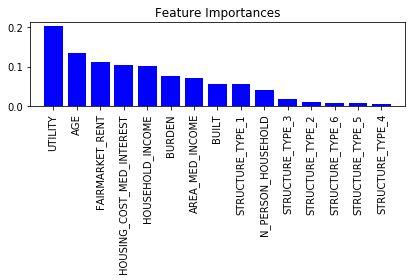

In [554]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices],color="blue",align="center")
plt.xticks(range(X.shape[1]),features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [555]:

from sklearn.model_selection import train_test_split
traindf,testdf = train_test_split(normalized_df,test_size=0.2, random_state=7)

In [625]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [626]:
features

['UTILITY',
 'AGE',
 'FAIRMARKET_RENT',
 'HOUSING_COST_MED_INTEREST',
 'HOUSEHOLD_INCOME',
 'BURDEN',
 'AREA_MED_INCOME',
 'BUILT',
 'STRUCTURE_TYPE_1',
 'N_PERSON_HOUSEHOLD',
 'STRUCTURE_TYPE_3',
 'STRUCTURE_TYPE_2',
 'STRUCTURE_TYPE_6',
 'STRUCTURE_TYPE_5',
 'STRUCTURE_TYPE_4']

In [638]:
features_train, features_test, target_train, target_test = train_test_split(
    normalized_df[features], normalized_df['TENURE'], test_size=0.2, random_state=1)

In [639]:
standardizer.fit(features_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [640]:
pipeline = make_pipeline(standardizer, logit)

In [641]:
cv_results = cross_val_score(pipeline, # Pipeline
                             features_train, # Feature matrix
                             target_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [642]:
cv_results.mean()

0.8254225807991583

In [644]:
model = logit.fit(features_train, target_train)

/Users/macdev/Documents/oreilly_course/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [645]:
model = logit.fit(features_train, target_train)
target_predicted = model.predict(features_test)

In [660]:
np.mean((model.predict(features_test) - target_test)**2)                                                

0.17397940586841626

In [651]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(target_test, target_predicted)

In [652]:
matrix

array([[24608,  3061],
       [ 4576, 11651]])

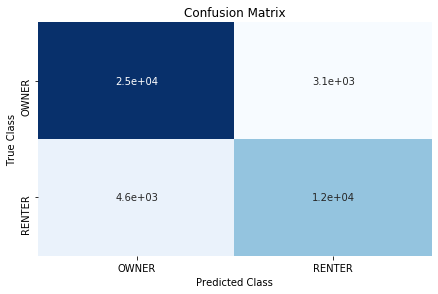

In [661]:
import seaborn as sns
# Create pandas dataframe
dataframe = pd.DataFrame(matrix)
class_names=['OWNER','RENTER']
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [662]:
target_predicted 

array([1, 1, 1, ..., 2, 1, 2])

In [664]:
features_test["TENURE"] = target_predicted 

In [666]:
features_test.to_csv("Prediction.csv")

In [668]:
pred_final = features_test

In [674]:
pred_final

,UTILITY,AGE,FAIRMARKET_RENT,HOUSING_COST_MED_INTEREST,HOUSEHOLD_INCOME,BURDEN,AREA_MED_INCOME,BUILT,STRUCTURE_TYPE_1,N_PERSON_HOUSEHOLD,STRUCTURE_TYPE_3,STRUCTURE_TYPE_2,STRUCTURE_TYPE_6,STRUCTURE_TYPE_5,STRUCTURE_TYPE_4,TENURE
62328,0.143211,36,0.198268,0.027883,0.034671,1.016977e-05,0.285156,1950,1,3,0,0,0,0,0,1
52845,0.149721,43,0.331408,0.045214,0.042134,1.373733e-05,0.392682,1995,1,4,0,0,0,0,0,1
39818,0.058896,76,0.096246,0.048918,0.050746,3.933487e-06,0.368490,2010,1,2,0,0,0,0,0,1
4225,0.113660,57,0.450433,0.055682,0.123729,5.742554e-06,0.727865,1919,1,3,0,0,0,0,0,1
8146,0.212441,77,0.313442,0.033999,0.077411,4.417474e-06,0.611979,1920,0,6,0,1,0,0,0,1
46582,0.106220,50,0.198268,0.039223,0.135970,5.660434e-07,0.285156,2005,0,2,0,0,0,1,0,1
2242,0.066336,26,0.272377,0.032102,0.032955,9.797406e-06,0.462344,1950,0,4,1,0,0,0,0,2
15567,0.046497,65,0.272377,0.002395,0.016979,1.418871e-06,0.319010,1919,1,4,0,0,0,0,0,2
2504,0.304608,74,0.481553,0.075271,0.031953,1.030050e-05,0.319010,1930,0,2,0,1,0,0,0,1
53801,0.070934,21,0.114854,0.027032,0.027856,9.760042e-06,0.345234,1995,1,3,0,0,0,0,0,2


In [690]:
new = pred_final.groupby(['BUILT','TENURE']).count().reset_index()

In [697]:
new["COUNT"] = new["UTILITY"]
new = new[['BUILT','TENURE', 'COUNT']]

/Users/macdev/Documents/oreilly_course/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [698]:
new

,BUILT,TENURE,COUNT
0,1919,1,1510
1,1919,2,901
2,1920,1,1044
3,1920,2,599
4,1930,1,987
5,1930,2,546
6,1940,1,1534
7,1940,2,815
8,1950,1,3269
9,1950,2,1240


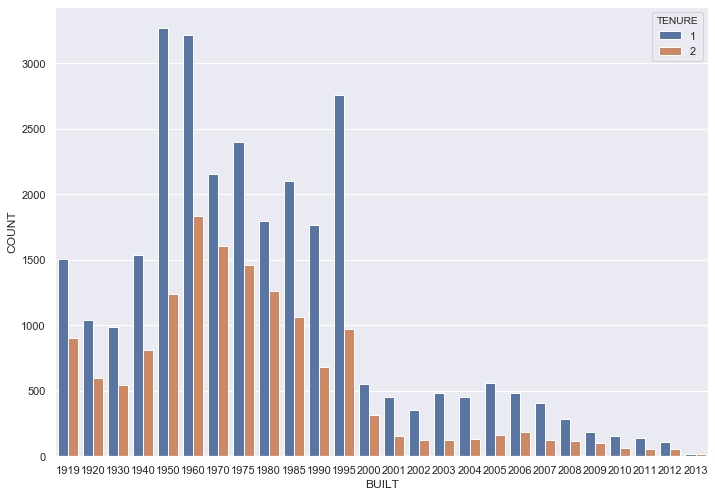

In [699]:
ax = sns.barplot(x="BUILT", y="COUNT", hue="TENURE", data=new)

In [672]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [591]:
# Fit standardizer to training set
standardizer.fit(features_train)

# Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [597]:
features_matrix = traindf[feature_labels]
features_matrix.head()

,UTILITY,AGE,FAIRMARKET_RENT,HOUSING_COST_MED_INTEREST,HOUSEHOLD_INCOME,BURDEN,AREA_MED_INCOME,BUILT,STRUCTURE_TYPE_1,N_PERSON_HOUSEHOLD,STRUCTURE_TYPE_3,STRUCTURE_TYPE_2,STRUCTURE_TYPE_6,STRUCTURE_TYPE_5,STRUCTURE_TYPE_4
49626,0.166563,48,0.382419,0.061101,0.060507,0.000016,0.260417,2004,1,2,0,0,0,0,0
17123,0.078115,93,0.261149,0.041621,0.008158,0.000009,0.273971,1995,0,1,0,0,1,0,0
21304,0.146415,57,0.237408,0.019998,0.030585,0.000004,0.296875,1975,1,1,0,0,0,0,0
31259,0.117793,47,0.395573,0.011547,0.058998,0.000002,0.627604,1980,1,4,0,0,0,0,0
63454,0.118516,72,0.376644,0.081351,0.044055,0.000014,0.320312,1985,0,2,0,1,0,0,0


In [598]:
target_matrix = traindf["TENURE"]
target_matrix.head()

49626    1
17123    1
21304    1
31259    1
63454    1
Name: TENURE, dtype: int64

In [599]:
standardizer = StandardScaler()

In [600]:
logit = LogisticRegression()

In [601]:
pipeline = make_pipeline(standardizer, logit)

In [602]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [603]:
cv_results = cross_val_score(pipeline, # Pipeline
                             features_matrix, # Feature matrix
                             target_matrix, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [604]:
cv_results.mean()

0.8257586258532175

In [494]:
features

['UTILITY',
 'AGE',
 'HOUSING_COST_MED_INTEREST',
 'FAIRMARKET_RENT',
 'MONTHLY_HOUSING_COST',
 'HOUSEHOLD_INCOME',
 'BURDEN',
 'AREA_MED_INCOME',
 'STRUCTURE_TYPE_1',
 'MED_INC_PERSON',
 'BUILT',
 'N_PERSON_HOUSEHOLD',
 'STRUCTURE_TYPE_3',
 'STRUCTURE_TYPE_2',
 'STRUCTURE_TYPE_6',
 'STRUCTURE_TYPE_5',
 'STRUCTURE_TYPE_4']